In [1]:
from utils import set_working_directory_up_two_levels
set_working_directory_up_two_levels()

In [2]:
import numpy as np
import pandas as pd 
import glob
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from src.plot.updates import procesar_metricas, \
                             summarize_metrics_by_group, \
                             summarize_metrics_for_plotting, \
                             plot_classification_metrics
from src.plot.general import save_plot
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

%load_ext autoreload
%autoreload 2

In [3]:
models = glob.glob(os.path.join('./presentation/pipelines/updates2025/output/*', '*', 'test_metrics.toml'))

In [4]:
resultados = procesar_metricas(models, folder='./presentation/pipelines/updates2025/output/')

[DEBUG] Patrón Regex usado: ^\./presentation/pipelines/updates2025/output/clf_([a-z]+)_(\d+)_(\d+)/([a-z_]+)/test_metrics\.toml$


In [5]:
resultados = resultados[~resultados['Classifier'].isin(['att_cls', 'avg', 'att_avg'])]

In [6]:
summary_df = summarize_metrics_by_group(resultados)

In [7]:
df_plot = summarize_metrics_for_plotting(resultados)

In [8]:
df_plot['F1_Score_error_low'] = df_plot['F1_Score_mean'] - df_plot['F1_Score_p05']
df_plot['F1_Score_error_high'] = df_plot['F1_Score_p95'] - df_plot['F1_Score_mean']

Plot saved successfully at: ./presentation/figures/classification/ablation_alcock.pdf
Plot saved successfully at: ./presentation/figures/classification/ablation_alcock.png


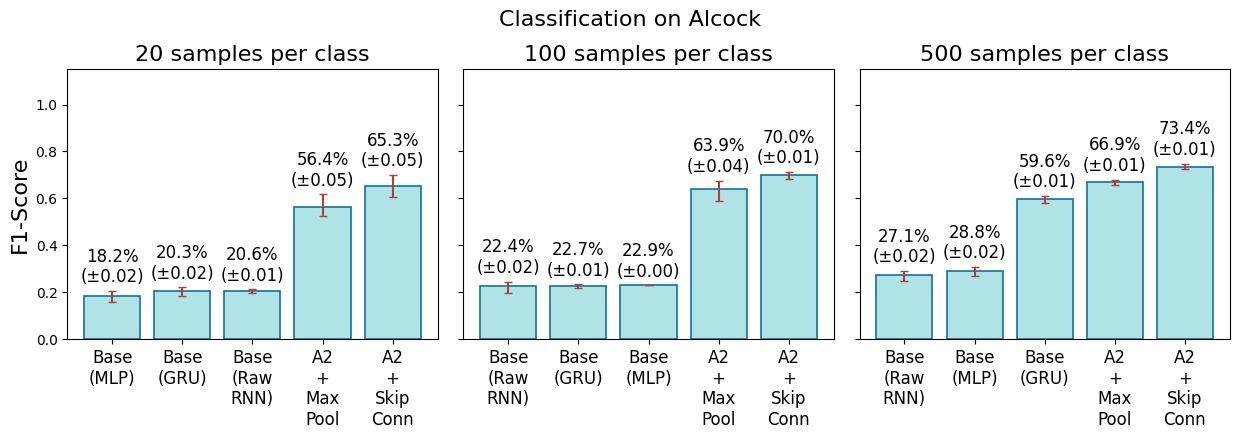

In [10]:
fig, axes = plt.subplots(1, 3, 
                        figsize=(5 * 3, 3.5), # Ajuste de altura
                        sharey=True, dpi=100, 
                        gridspec_kw={'wspace': 0.07})
                        
fig, axes = plot_classification_metrics(df_plot, fig, axes, 
                                        dataset_name='alcock')
save_plot(fig, './presentation/figures/classification/ablation_alcock.pdf')
save_plot(fig, './presentation/figures/classification/ablation_alcock.png')


Plot saved successfully at: ./presentation/figures/classification/ablation_atlas.pdf
Plot saved successfully at: ./presentation/figures/classification/ablation_atlas.png


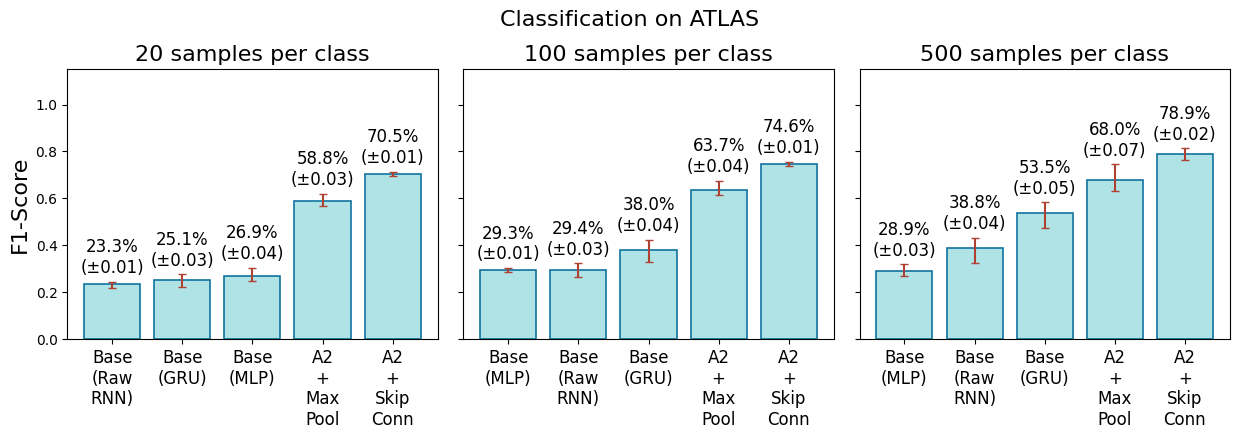

In [11]:
fig, axes = plt.subplots(1, 3, 
                        figsize=(5 * 3, 3.5), # Ajuste de altura
                        sharey=True, dpi=100, 
                        gridspec_kw={'wspace': 0.07})
                        
fig, axes = plot_classification_metrics(df_plot, fig, axes, 
                                        dataset_name='atlas')
save_plot(fig, './presentation/figures/classification/ablation_atlas.pdf')
save_plot(fig, './presentation/figures/classification/ablation_atlas.png')